In [1]:
import os
import numpy as np
import pandas as pd

# Directory containing your .npy files
folder_path = r"C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\output_tensors_sinecurve_and_number_seq"



# Function to summarize the data in a .npy file
def summarize_npy(file_path):
    # Load the .npy file
    data = np.load(file_path)
    
    # Get the shape of the data
    shape = data.shape
    
    # Flatten the data along the first axis to get a 2D array (if it's 3D)
    # Assuming the data has the shape (samples, window, features)
    flattened_data = data.reshape(-1, shape[-1])
    
    # Convert to DataFrame for easier analysis
    df = pd.DataFrame(flattened_data)
    
    # Get basic statistics for each feature/column
    summary = df.describe().T[['min', 'max', 'mean', 'std']]
    
    return shape, summary

# List all .npy files in the folder
npy_files = [f for f in os.listdir(folder_path) if f.endswith('.npy')]

# Iterate through each .npy file and summarize
for npy_file in npy_files:
    file_path = os.path.join(folder_path, npy_file)
    
    # Get the shape and summary statistics
    shape, summary = summarize_npy(file_path)
    
    # Print the results
    print(f"File: {npy_file}")
    print(f"Shape: {shape}")
    print("Summary Statistics (per column/feature):")
    print(summary)
    print("\n" + "="*80 + "\n")


File: ddpm_fake_denormalizedsinecurve_and_number_diffusion-ts.npy
Shape: (588, 24, 2)
Summary Statistics (per column/feature):
   min  max      mean       std
0  0.0  1.0  0.513150  0.485724
1  0.0  1.0  0.494462  0.488284


File: ddpm_fake_denormalizedsinecurve_and_number_no date.npy
Shape: (11928, 24, 2)
Summary Statistics (per column/feature):
   min  max      mean       std
0  0.0  1.0  0.550095  0.463150
1  0.0  1.0  0.489614  0.479054


File: ddpm_fake_denormalizedtest.npy
Shape: (567, 24, 2)
Summary Statistics (per column/feature):
   min  max      mean       std
0  0.0  1.0  0.542074  0.463808
1  0.0  1.0  0.507867  0.480091


File: ddpm_fake_normalizedtest.npy
Shape: (567, 24, 2)
Summary Statistics (per column/feature):
   min  max      mean       std
0 -1.0  1.0  0.084148  0.927616
1 -1.0  1.0  0.015733  0.960182


File: input_data_testdataset_timeautodiff.npy
Shape: (572, 24, 2)
Summary Statistics (per column/feature):
   min   max       mean       std
0  0.0  23.0  11.48076

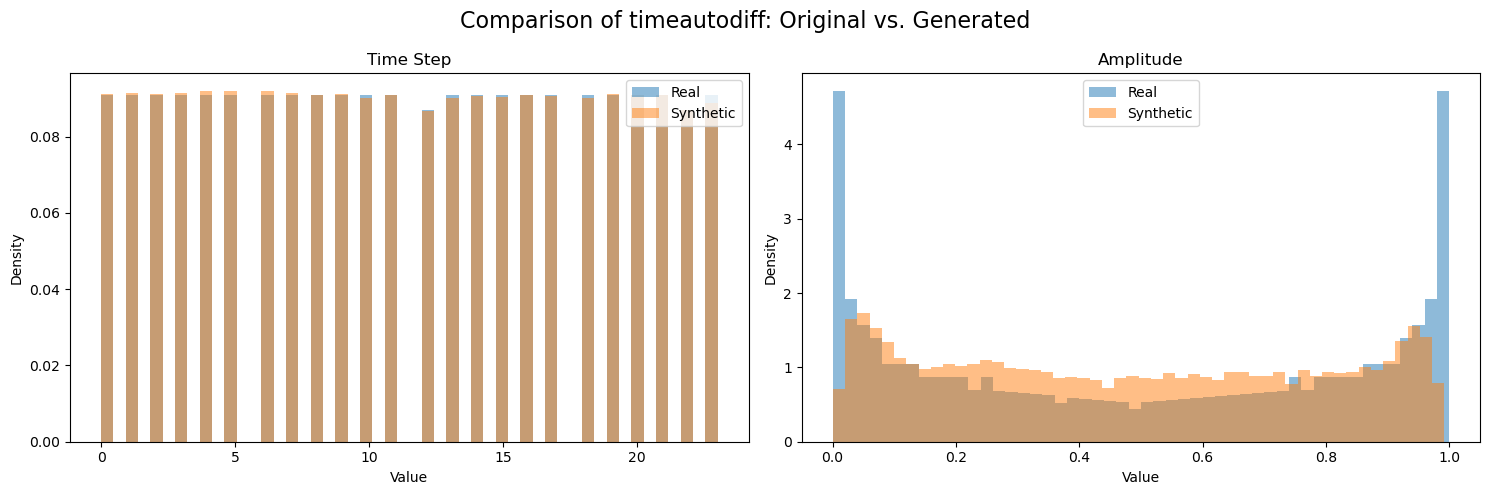

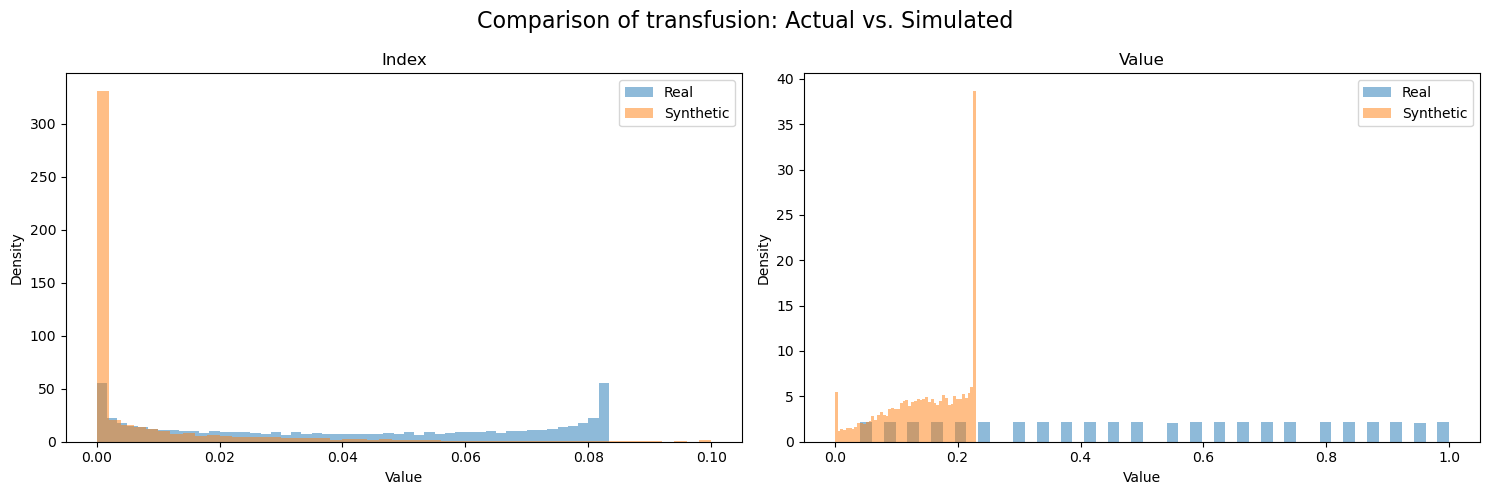

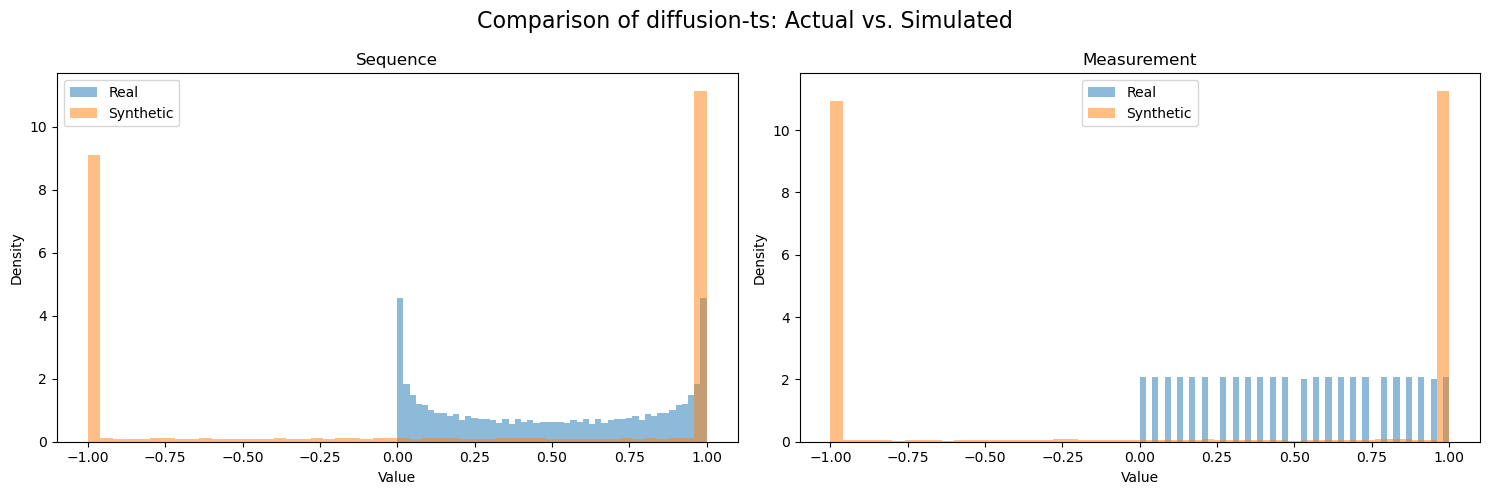

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def denormalize(data, original_min, original_max, current_min, current_max):
    """
    Denormalize the data from the current range to the original range.
    """
    return (data - current_min) / (current_max - current_min) * (original_max - original_min) + original_min

def plot_dataset_comparison(real_data, synthetic_data, title, feature_names, normalization=None):
    """
    Plot comparison histograms for real and synthetic data, with optional denormalization.
    
    :param real_data: numpy array of shape (samples, seq_len, 2)
    :param synthetic_data: numpy array of shape (samples, seq_len, 2)
    :param title: string, title for the plot
    :param feature_names: list of strings, names for the two features
    :param normalization: dict with keys 'range' and 'original_ranges' for denormalization
    """
    # Flatten the data across samples and sequence length
    real_flat = real_data.reshape(-1, 2)
    synthetic_flat = synthetic_data.reshape(-1, 2)
    
    # Denormalize synthetic data if necessary
    if normalization:
        for i in range(2):
            current_min, current_max = normalization['range']
            original_min, original_max = normalization['original_ranges'][i]
            synthetic_flat[:, i] = denormalize(synthetic_flat[:, i], original_min, original_max, current_min, current_max)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(title, fontsize=16)
    
    for i, (ax, feature_name) in enumerate(zip([ax1, ax2], feature_names)):
        ax.hist(real_flat[:, i], bins=50, alpha=0.5, label='Real', density=True)
        ax.hist(synthetic_flat[:, i], bins=50, alpha=0.5, label='Synthetic', density=True)
        ax.set_title(feature_name)
        ax.set_xlabel('Value')
        ax.set_ylabel('Density')
        ax.legend()
    
    plt.tight_layout()
    plt.show()
    
# Hardcode your file paths and titles here
dataset_info = [
    {
        'real_path': r'C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\output_tensors_sinecurve_and_number_seq\input_data_testdataset_timeautodiff.npy',
        'synthetic_path': r'C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\output_tensors_sinecurve_and_number_seq\synth_data_testdata_timeautodiff.npy',
        'title': 'Comparison of timeautodiff: Original vs. Generated',
        'feature_names': ['Time Step', 'Amplitude'],
        'normalization': None
    },
    {
        'real_path': r'C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\output_tensors_sinecurve_and_number_seq\origi_test_data.npy',
        #'synthetic_path': r'C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\output_tensors_sinecurve_and_number_seq\synth-sinecurve_and_number_seq-24-0_transfusion_untransposed_pred_noise.npy',
        'synthetic_path': r'C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\output_tensors_sinecurve_and_number_seq\synth_normalized_transposed-test_dataset-24-0.npy',        
        'title': 'Comparison of transfusion: Actual vs. Simulated',
        'feature_names': ['Index', 'Value'],
        #'normalization': None
        'normalization': {
            'range': (0, 1),
            'original_ranges': [(0, 0.1), (0, 0.23)]
        }
    },
    {
        'real_path': r'C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\output_tensors_sinecurve_and_number_seq\testdata_norm_truth_24_train.npy',
        'synthetic_path': r'C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\output_tensors_sinecurve_and_number_seq\ddpm_fake_normalizedtest.npy',
        'title': 'Comparison of diffusion-ts: Actual vs. Simulated',
        'feature_names': ['Sequence', 'Measurement'],
        'normalization': None
      #'normalization': {
       #     'range': (-1, 1),
        #    'original_ranges': [(0, 1), (0, 23) ]
      #}
    }
]

# Loop through the dataset information and create plots
for info in dataset_info:
    real_data = np.load(info['real_path'])
    synthetic_data = np.load(info['synthetic_path'])
    plot_dataset_comparison(real_data, synthetic_data, info['title'], 
                            info['feature_names'], info['normalization'])

Real data shape: (549, 24, 2)
Synthetic data shape: (567, 24, 2)

Real Data Summary Statistics:
   min  max      mean       std
0  0.0  1.0  0.500000  0.353584
1  0.0  1.0  0.499129  0.300879

Synthetic Data Summary Statistics:
   min  max      mean       std
0  0.0  1.0  0.542074  0.463791
1  0.0  1.0  0.507867  0.480073


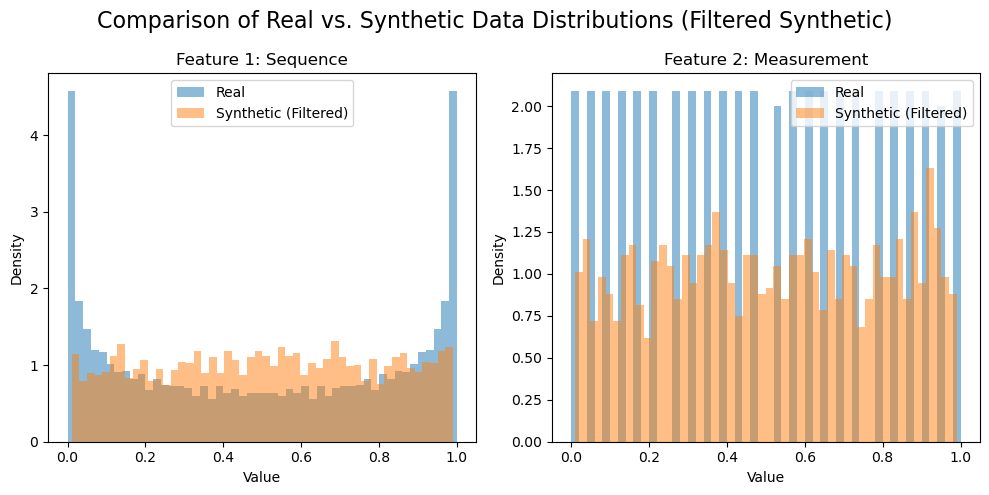

KL Divergence for Feature 1: 0.9712182597173292
KL Divergence for Feature 2: 2.403154299417541


ValueError: Length of values (2) does not match length of index (5)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load datasets
real_data_path = r'C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\output_tensors_sinecurve_and_number_seq\testdata_norm_truth_24_train.npy'
synthetic_data_path = r'C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\output_tensors_sinecurve_and_number_seq\ddpm_fake_denormalizedtest.npy'

real_data = np.load(real_data_path)
synthetic_data = np.load(synthetic_data_path)

# Check the shape of datasets
print(f"Real data shape: {real_data.shape}")
print(f"Synthetic data shape: {synthetic_data.shape}")

# 2. Function to compute summary statistics
def summarize_data(data, name):
    """
    Computes summary statistics (min, max, mean, std) for each feature in the dataset.
    """
    print(f"\n{name} Summary Statistics:")
    summary = pd.DataFrame({
        'min': data.min(axis=(0, 1)),
        'max': data.max(axis=(0, 1)),
        'mean': data.mean(axis=(0, 1)),
        'std': data.std(axis=(0, 1))
    })
    print(summary)
    return summary

# Summarize both datasets
real_summary = summarize_data(real_data, "Real Data")
synthetic_summary = summarize_data(synthetic_data, "Synthetic Data")

# 3. Plot comparison for each feature with filtering for synthetic data
def plot_feature_distributions(real_data, synthetic_data, feature_names):
    """
    Plots histograms for real and synthetic data for each feature, 
    excluding synthetic values in the ranges 0.00 - 0.01 and 0.99 - 1.00.
    """
    num_features = real_data.shape[2]
    
    # Filter out synthetic data in the ranges [0.00 - 0.01] and [0.99 - 1.00]
    synthetic_filtered = np.where((synthetic_data > 0.01) & (synthetic_data < 0.99), synthetic_data, np.nan)
    
    fig, axes = plt.subplots(1, num_features, figsize=(5 * num_features, 5))
    fig.suptitle('Comparison of Real vs. Synthetic Data Distributions (Filtered Synthetic)', fontsize=16)
    
    for i, ax in enumerate(axes):
        # Plot histograms for real data
        ax.hist(real_data[:, :, i].flatten(), bins=50, alpha=0.5, label='Real', density=True)
        # Plot histograms for filtered synthetic data
        ax.hist(synthetic_filtered[:, :, i].flatten(), bins=50, alpha=0.5, label='Synthetic (Filtered)', density=True)
        ax.set_title(f"Feature {i+1}: {feature_names[i]}")
        ax.set_xlabel('Value')
        ax.set_ylabel('Density')
        ax.legend()
    
    plt.tight_layout()
    plt.show()

# Assuming 5 features, adjust names accordingly
feature_names = ['Sequence', 'Measurement', 'Feature3', 'Feature4', 'Feature5']
plot_feature_distributions(real_data, synthetic_data, feature_names)

# 4. Optional: Calculate distance metrics (e.g., KL divergence or others) to quantify similarity
from scipy.stats import entropy

def calculate_kl_divergence(real_data, synthetic_data):
    """
    Calculates KL divergence for each feature between real and synthetic data.
    """
    kl_divergences = []
    for i in range(real_data.shape[2]):
        # Flatten both real and synthetic feature data
        real_flat = real_data[:, :, i].flatten()
        synthetic_flat = synthetic_data[:, :, i].flatten()
        
        # Estimate probability density functions using histograms
        real_hist, bin_edges = np.histogram(real_flat, bins=50, density=True)
        synthetic_hist, _ = np.histogram(synthetic_flat, bins=50, density=True)
        
        # Small adjustment to avoid division by zero
        real_hist = np.where(real_hist == 0, 1e-10, real_hist)
        synthetic_hist = np.where(synthetic_hist == 0, 1e-10, synthetic_hist)
        
        # KL divergence (relative entropy)
        kl_div = entropy(real_hist, synthetic_hist)
        kl_divergences.append(kl_div)
        print(f"KL Divergence for Feature {i+1}: {kl_div}")
    
    return kl_divergences

kl_divergences = calculate_kl_divergence(real_data, synthetic_data)

# 5. Combine summary statistics with distance metrics into a comprehensive comparison table
def create_comparison_table(real_summary, synthetic_summary, kl_divergences):
    """
    Combines real and synthetic summary statistics with KL divergence into one DataFrame.
    """
    comparison = pd.DataFrame({
        'Real Mean': real_summary['mean'],
        'Synthetic Mean': synthetic_summary['mean'],
        'Real Std': real_summary['std'],
        'Synthetic Std': synthetic_summary['std'],
        'KL Divergence': kl_divergences
    }, index=feature_names)
    
    print("\nComprehensive Comparison Table:")
    print(comparison)
    return comparison

comparison_table = create_comparison_table(real_summary, synthetic_summary, kl_divergences)


In [29]:
import numpy as np

# Load the synthetic data (replace path with correct one)
synthetic_data = np.load(r'C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\output_tensors_sinecurve_and_number_seq\ddpm_fake_denormalizedsines.npy')

# Check unique values and their frequencies
unique, counts = np.unique(synthetic_data, return_counts=True)

# Create a dictionary to show the unique values and their counts
value_distribution = dict(zip(unique, counts))

# Print the unique values and their frequencies
print("Unique values in the synthetic data and their frequencies:")
for value, count in value_distribution.items():
    print(f"Value: {value}, Count: {count}")

# Check how many values are 0 or 1
total_values = synthetic_data.size
zero_count = np.sum(synthetic_data == 0)
one_count = np.sum(synthetic_data == 1)

print(f"\nTotal values: {total_values}")
print(f"Number of 0s: {zero_count} ({(zero_count / total_values) * 100:.2f}%)")
print(f"Number of 1s: {one_count} ({(one_count / total_values) * 100:.2f}%)")


Unique values in the synthetic data and their frequencies:
Value: 0.0, Count: 49832
Value: 4.273653030395508e-05, Count: 1
Value: 9.164214134216309e-05, Count: 1
Value: 0.00033462047576904297, Count: 1
Value: 0.0003750324249267578, Count: 1
Value: 0.0004241466522216797, Count: 1
Value: 0.0004583597183227539, Count: 1
Value: 0.0004642009735107422, Count: 1
Value: 0.0005410313606262207, Count: 1
Value: 0.0007896721363067627, Count: 1
Value: 0.0007905364036560059, Count: 1
Value: 0.0008001029491424561, Count: 1
Value: 0.0008359253406524658, Count: 1
Value: 0.0008708834648132324, Count: 1
Value: 0.0009197592735290527, Count: 1
Value: 0.0010622143745422363, Count: 1
Value: 0.0011148154735565186, Count: 1
Value: 0.0012209415435791016, Count: 1
Value: 0.0012399256229400635, Count: 1
Value: 0.0013481080532073975, Count: 1
Value: 0.0013631880283355713, Count: 1
Value: 0.0016016662120819092, Count: 1
Value: 0.0016059577465057373, Count: 1
Value: 0.0017527341842651367, Count: 1
Value: 0.001799553

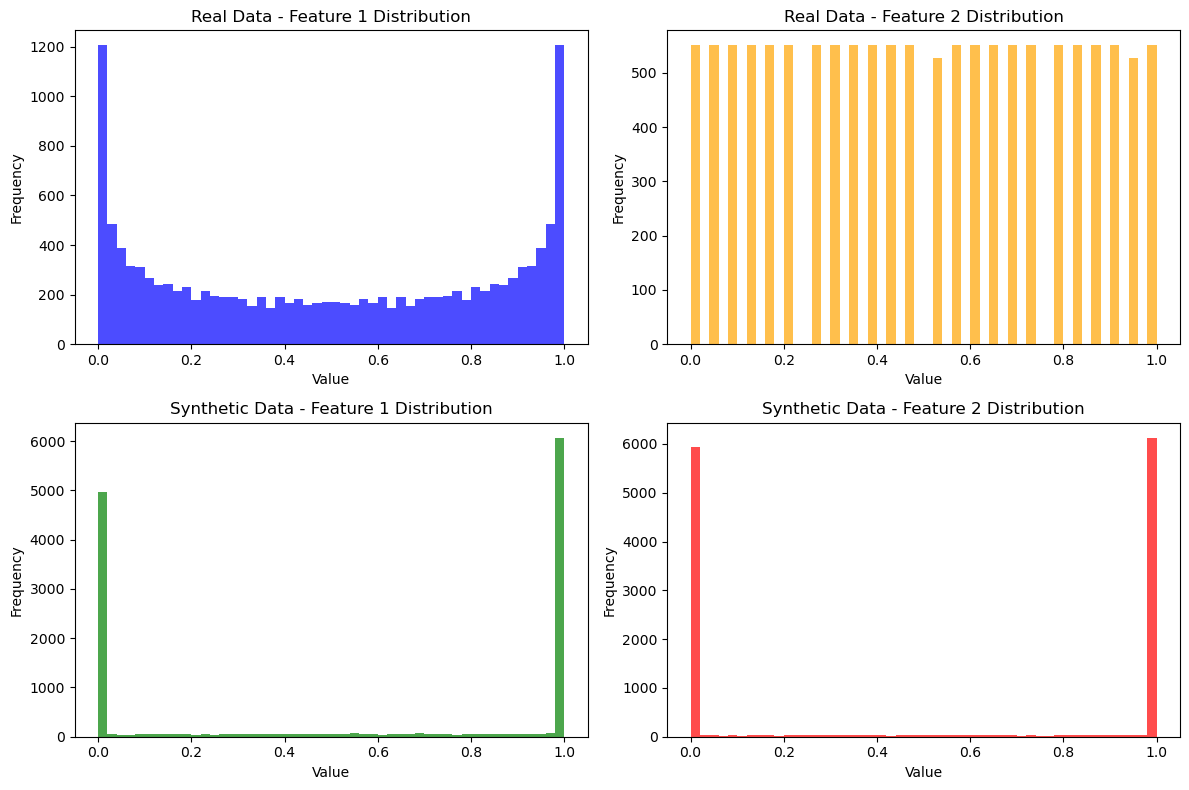

In [34]:
#diffusion-ts

import numpy as np
import matplotlib.pyplot as plt

# File paths
real_path = r'C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\output_tensors_sinecurve_and_number_seq\testdata_norm_truth_24_train.npy'
synthetic_path = r'C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\output_tensors_sinecurve_and_number_seq\ddpm_fake_denormalizedtest.npy'
# Load data
real_data = np.load(real_path)
synthetic_data = np.load(synthetic_path)

# Separate the two features for real and synthetic data
real_feature_1 = real_data[:, :, 0].flatten()
real_feature_2 = real_data[:, :, 1].flatten()

synthetic_feature_1 = synthetic_data[:, :, 0].flatten()
synthetic_feature_2 = synthetic_data[:, :, 1].flatten()

# Create histograms for real and synthetic data, feature 1 and feature 2
plt.figure(figsize=(12, 8))

# Real Data Feature 1
plt.subplot(2, 2, 1)
plt.hist(real_feature_1, bins=50, range=(0, 1), color='blue', alpha=0.7)
plt.title('Real Data - Feature 1 Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Real Data Feature 2
plt.subplot(2, 2, 2)
plt.hist(real_feature_2, bins=50, range=(0, 1), color='orange', alpha=0.7)
plt.title('Real Data - Feature 2 Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Synthetic Data Feature 1
plt.subplot(2, 2, 3)
plt.hist(synthetic_feature_1, bins=50, range=(0, 1), color='green', alpha=0.7)
plt.title('Synthetic Data - Feature 1 Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Synthetic Data Feature 2
plt.subplot(2, 2, 4)
plt.hist(synthetic_feature_2, bins=50, range=(0, 1), color='red', alpha=0.7)
plt.title('Synthetic Data - Feature 2 Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


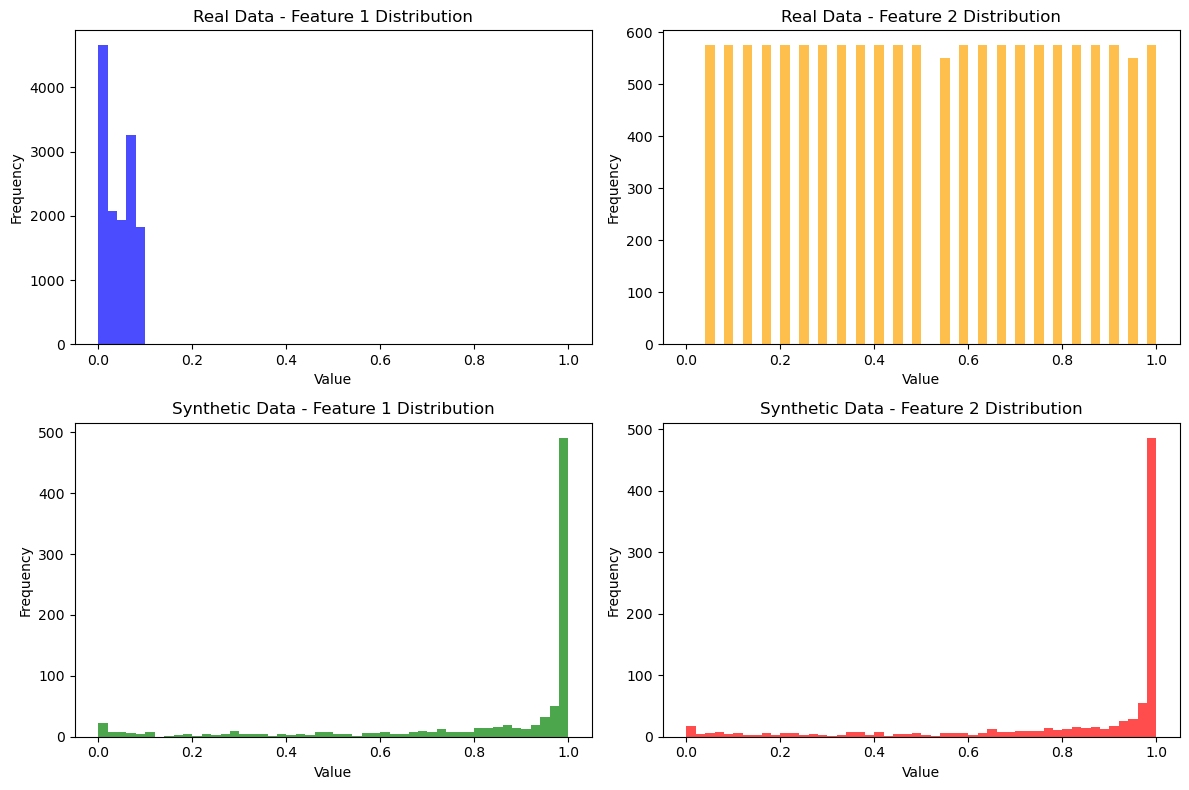

In [107]:
#ttransfusion

import numpy as np
import matplotlib.pyplot as plt

# File paths
real_path = r'C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\output_tensors_sinecurve_and_number_seq\sinecurve_and_number_seq_origi_data_samples_transfusion.npy'
synthetic_path = r'C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\output_tensors_sinecurve_and_number_seq\synth_untransposed-sinecurve_and_number_seq-24-0.npy'

# Load data
real_data = np.load(real_path)
synthetic_data = np.load(synthetic_path)

# Separate the two features for real and synthetic data
real_feature_1 = real_data[:, :, 0].flatten()
real_feature_2 = real_data[:, :, 1].flatten()

synthetic_feature_1 = synthetic_data[:, :, 0].flatten()
synthetic_feature_2 = synthetic_data[:, :, 1].flatten()

# Create histograms for real and synthetic data, feature 1 and feature 2
plt.figure(figsize=(12, 8))

# Real Data Feature 1
plt.subplot(2, 2, 1)
plt.hist(real_feature_1, bins=50, range=(0, 1), color='blue', alpha=0.7)
plt.title('Real Data - Feature 1 Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Real Data Feature 2
plt.subplot(2, 2, 2)
plt.hist(real_feature_2, bins=50, range=(0, 1), color='orange', alpha=0.7)
plt.title('Real Data - Feature 2 Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Synthetic Data Feature 1
plt.subplot(2, 2, 3)
plt.hist(synthetic_feature_1, bins=50, range=(0, 1), color='green', alpha=0.7)
plt.title('Synthetic Data - Feature 1 Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Synthetic Data Feature 2
plt.subplot(2, 2, 4)
plt.hist(synthetic_feature_2, bins=50, range=(0, 1), color='red', alpha=0.7)
plt.title('Synthetic Data - Feature 2 Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


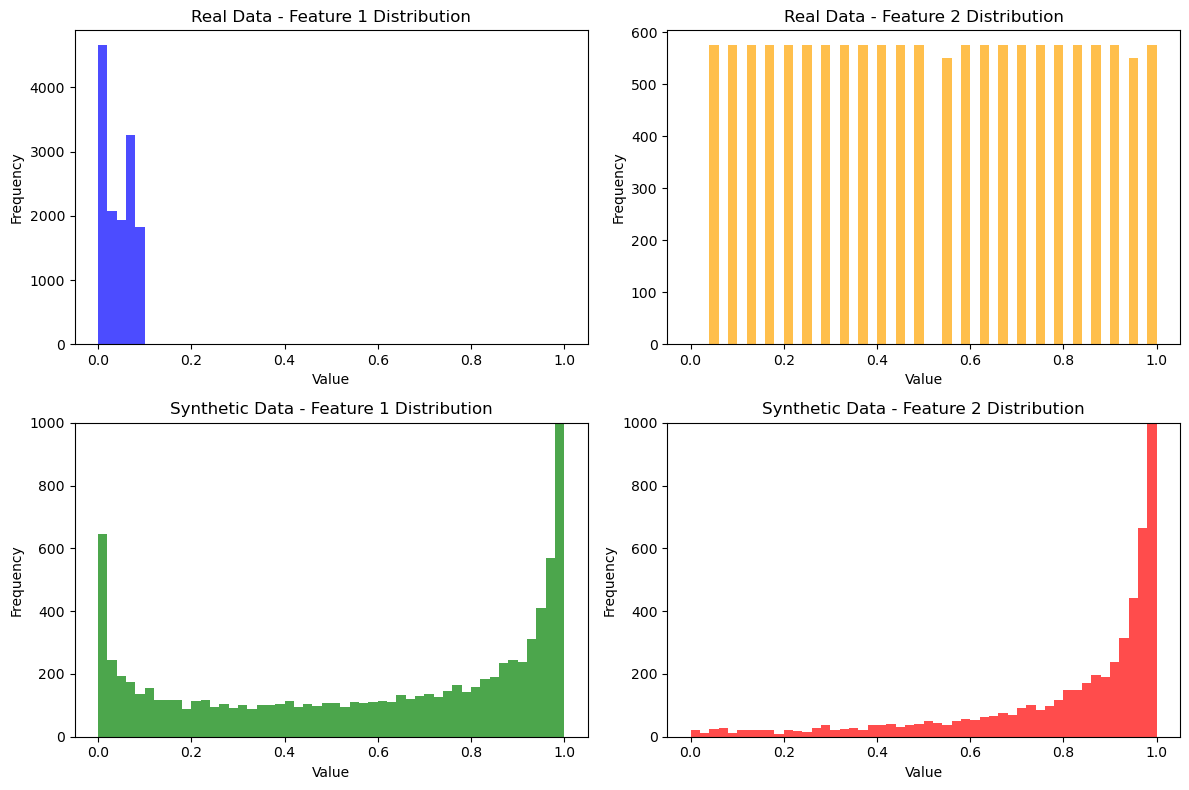

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# File paths
real_path = r'C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\output_tensors_sinecurve_and_number_seq\sinecurve_and_number_seq_origi_data_samples_transfusion.npy'
synthetic_path = r'C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\output_tensors_sinecurve_and_number_seq\synth-sinecurve_and_number_seq-24-0.npy'

# Load data
real_data = np.load(real_path)
synthetic_data = np.load(synthetic_path)

# Separate the two features for real and synthetic data
real_feature_1 = real_data[:, :, 0].flatten()
real_feature_2 = real_data[:, :, 1].flatten()

synthetic_feature_1 = synthetic_data[:, :, 0].flatten()
synthetic_feature_2 = synthetic_data[:, :, 1].flatten()

# Create histograms for real and synthetic data, feature 1 and feature 2
plt.figure(figsize=(12, 8))

# Real Data Feature 1
plt.subplot(2, 2, 1)
plt.hist(real_feature_1, bins=50, range=(0, 1), color='blue', alpha=0.7)
plt.title('Real Data - Feature 1 Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Real Data Feature 2
plt.subplot(2, 2, 2)
plt.hist(real_feature_2, bins=50, range=(0, 1), color='orange', alpha=0.7)
plt.title('Real Data - Feature 2 Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Synthetic Data Feature 1
plt.subplot(2, 2, 3)
plt.hist(synthetic_feature_1, bins=50, range=(0, 1), color='green', alpha=0.7)
plt.title('Synthetic Data - Feature 1 Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.ylim(0, 1000)  # Set y-axis limit to 1000

# Synthetic Data Feature 2
plt.subplot(2, 2, 4)
plt.hist(synthetic_feature_2, bins=50, range=(0, 1), color='red', alpha=0.7)
plt.title('Synthetic Data - Feature 2 Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.ylim(0, 1000)  # Set y-axis limit to 1000

plt.tight_layout()
plt.show()


In [91]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Read the original data
df = pd.read_csv(r"C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\TransFusion-main\data\sinecurve_and_number_seq.csv")

# Convert date string to datetime
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y %H:%M')

# Get the first and last date
start_date = df['date'].min()
end_date = df['date'].max()

# Calculate the duration of the original dataset
original_duration = end_date - start_date

# Create a new date range that is 20 times longer
new_end_date = start_date + 20 * original_duration
new_date_range = pd.date_range(start=start_date, end=new_end_date, freq='H')

# Create a new dataframe with the extended date range
new_df = pd.DataFrame({'date': new_date_range})

# Calculate the sine values and numbers for the new dataframe
new_df[' Sine Value'] = np.tile(df[' Sine Value'], len(new_df) // len(df) + 1)[:len(new_df)]
new_df[' number'] = new_df['date'].dt.hour

# Adjust 'number' column to start from 1 and go up to 23, then reset to 0
new_df[' number'] = (new_df[' number'] % 24) + 1
new_df.loc[new_df[' number'] == 24, ' number'] = 0

# Format the date column to match the original
new_df['date'] = new_df['date'].dt.strftime('%d.%m.%Y %H:%M')

# Save the new dataframe to a CSV file
output_path = r"C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\TransFusion-main\data\extended_sinecurve_and_number_seq.csv"
new_df.to_csv(output_path, index=False)

print(f"Extended dataset created with {len(new_df)} rows.")
print(f"Date range: {new_df['date'].iloc[0]} to {new_df['date'].iloc[-1]}")
print(f"Output saved to: {output_path}")


Extended dataset created with 11940 rows.
Date range: 01.01.2024 01:00 to 12.05.2025 12:00
Output saved to: C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\TransFusion-main\data\extended_sinecurve_and_number_seq.csv


In [3]:
import numpy as np
import pandas as pd

# File paths (replace with actual paths)
files = {
    'Transfusion Real': r'C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\output_tensors_sinecurve_and_number_seq\reshaped_ori_data_transfusion.npy',
    'Transfusion Synthetic': r'C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\output_tensors_sinecurve_and_number_seq\synth-sinecurve_and_number_seq-24-0_transfusion.npy',
    'Diffusion Real': r'C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\output_tensors_sinecurve_and_number_seq\sinecurve_and_number_ground_truth_24_train_diffusion-ts.npy',
    'Diffusion Synthetic': r'C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\output_tensors_sinecurve_and_number_seq\ddpm_fake_normalizedsinecurve_and_number_diffusion-ts.npy'
}

# Load each dataset and display basic information
data_summary = []

for name, path in files.items():
    data = np.load(path)
    num_samples, seq_len, num_features = data.shape
    flattened_data = data.reshape(-1, num_features)  # Flatten samples for basic stats
    
    df = pd.DataFrame(flattened_data, columns=[f'Feature_{i+1}' for i in range(num_features)])
    summary_stats = df.describe().T  # Get basic statistics
    summary_stats['Dataset'] = name
    summary_stats['Num_Samples'] = num_samples
    summary_stats['Seq_Len'] = seq_len
    summary_stats['Num_Features'] = num_features
    
    data_summary.append(summary_stats)

# Combine the summaries for all datasets into one table
summary_table = pd.concat(data_summary)

# Output summary
print(summary_table)


             count       mean       std       min       25%        50%  \
Feature_1    576.0   0.008012  0.719504 -0.999986 -0.725427   0.057756   
Feature_2    576.0  11.446180  6.939281  0.000000  5.000000  11.000000   
Feature_1   2760.0   0.103786  0.147439  0.000000  0.000000   0.029831   
Feature_2   2760.0   0.109667  0.175746  0.000000  0.000000   0.015950   
Feature_1  13752.0   0.000471  0.721119 -0.999986 -0.730836   0.005253   
Feature_2  13752.0  11.480803  6.920562  0.000000  5.000000  11.000000   
Feature_1  14112.0   0.166667  0.986048 -1.000000 -1.000000   1.000000   
Feature_2  14112.0  -0.916667  0.399667 -1.000000 -1.000000  -1.000000   

                 75%        max                Dataset  Num_Samples  Seq_Len  \
Feature_1   0.725427   0.999986       Transfusion Real           24       24   
Feature_2  17.000000  23.000000       Transfusion Real           24       24   
Feature_1   0.161602   0.958061  Transfusion Synthetic          115       24   
Feature_2   0

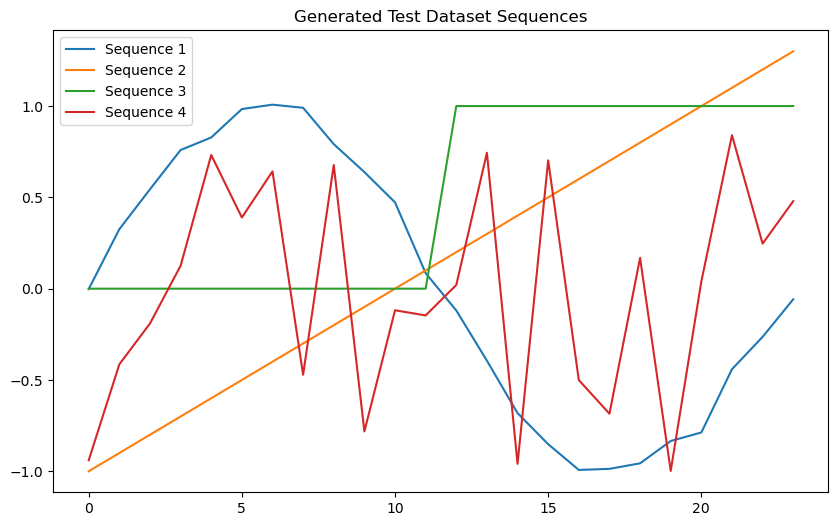

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sine_wave(seq_length, freq=1.0, amplitude=1.0, noise_level=0.0):
    """
    Generates a sine wave with optional noise.
    """
    x = np.linspace(0, 2 * np.pi, seq_length)
    sine_wave = amplitude * np.sin(freq * x)
    noise = np.random.normal(0, noise_level, seq_length)
    return sine_wave + noise

def generate_ramp(seq_length, slope=1.0, intercept=0.0):
    """
    Generates a linear ramp.
    """
    return slope * np.arange(seq_length) + intercept

def generate_step_function(seq_length, step_position=12, low_value=0.0, high_value=1.0):
    """
    Generates a step function where values switch from low to high at step_position.
    """
    return np.array([low_value if i < step_position else high_value for i in range(seq_length)])

def generate_random_sequence(seq_length, low=-1, high=1):
    """
    Generates a sequence of random values.
    """
    return np.random.uniform(low, high, seq_length)

# Generate a sample test dataset with a sequence length of 24
seq_length = 24
test_dataset = np.array([
    generate_sine_wave(seq_length, freq=1.0, amplitude=1.0, noise_level=0.05),  # Sine wave with small noise
    generate_ramp(seq_length, slope=0.1, intercept=-1),  # Linear ramp
    generate_step_function(seq_length, step_position=12),  # Step function
    generate_random_sequence(seq_length, low=-1, high=1)  # Random sequence
])

# Plot the generated sequences for visualization
plt.figure(figsize=(10, 6))
for i, data in enumerate(test_dataset):
    plt.plot(data, label=f'Sequence {i+1}')
plt.title('Generated Test Dataset Sequences')
plt.legend()
plt.show()

# Reshape to match the (num_samples, seq_length, features) format
test_dataset = test_dataset.reshape(-1, seq_length, 1)  # 1 feature for simplicity
